### Unsupervised Learning: Principal Component Analysis
#### PCA: Visualize and classify MNIST handwritten images

- Dataset: hand written dataset (mnist_28x28_5000rows.csv.zip)
- Learning Date: 4-Sep-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

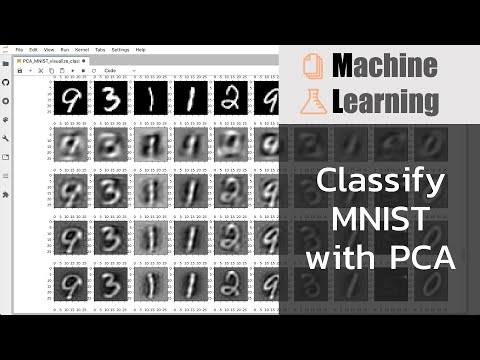

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('QIB6G0pkwmI', width = 720, height = 405)

In [2]:
# import libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
pd.Timestamp.now()

Timestamp('2023-09-04 22:16:42.532528')

In [6]:
# read csv.zip data into a dataframe

data_file = 'https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


In [7]:
df = pd.read_csv(data_file)
df.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df.shape

(5000, 785)

In [8]:
28*28

784

In [10]:
print(df.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)


In [12]:
D = df[df.columns[df.columns.str.startswith('pixel')]].to_numpy()
D.shape

(5000, 784)

In [14]:
D.shape[1]/28

28.0

n = 2446
target = 2


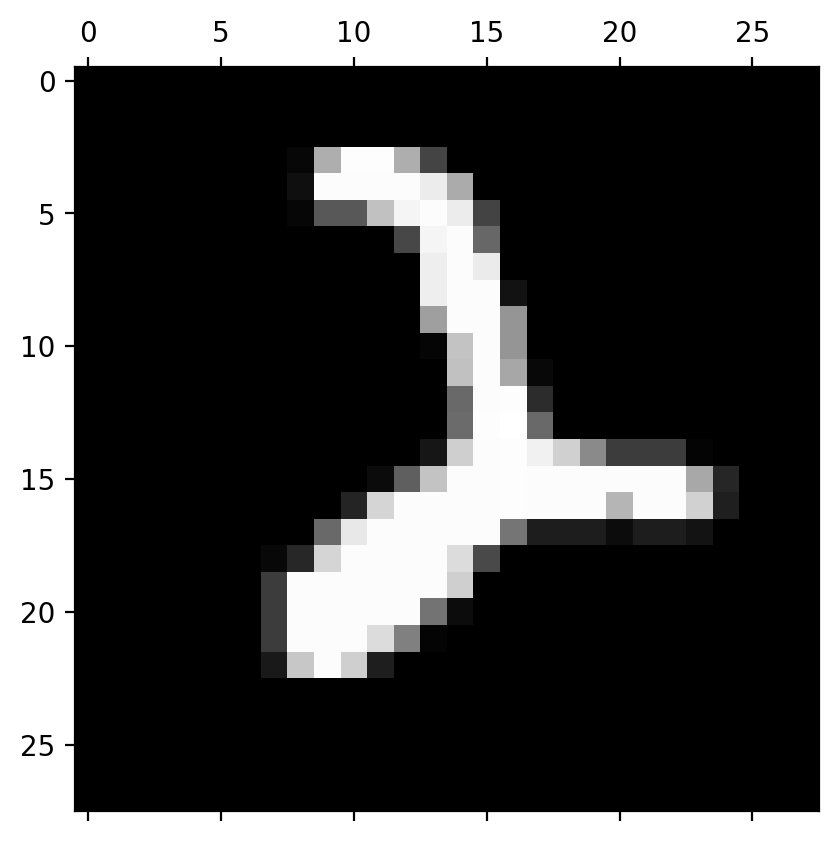

In [15]:
n = np.random.randint(0, D.shape[0])
print(f'n = {n}')
print(f"target = {df['class'].iloc[n]}")
plt.matshow(D[n].reshape(28, 28), cmap='gray')